In [1]:
%load_ext autoreload

%autoreload 2

from hi4lines_insp import og2yolo

/home/alema416/dev/work/HI4Lines_Insp/hi4lines_insp/og2yolo.py:11: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../configs/"):


## IDIDv1.2 Dataset

notes

In [15]:
import json
from pathlib import Path

from PIL import Image                        # or: import cv2
import matplotlib.pyplot as plt              # imshow: display images :contentReference[oaicite:2]{index=2}
import matplotlib.patches as patches         # Rectangle patches :contentReference[oaicite:3]{index=3}


In [19]:
IMG_DIR  = Path("../data/raw/ididv12/Train/Images")
ANN_DIR  = Path("../data/raw/ididv12/Train")


In [24]:
import json
from pathlib import Path

# 1) Point to your single JSON file
annot_file = Path("../data/raw/ididv12/Train/labels_v1.2.json")

# 2) Load the entire annotations dict
with open(annot_file, "r") as f:
    data = json.load(f)   # reads JSON into nested Python dicts/lists :contentReference[oaicite:6]{index=6}


In [26]:
# Using list comprehension to grab the entry for one filename :contentReference[oaicite:7]{index=7}
entry = next(
    (img for img in data if img["filename"] == "000001268.JPG"),
    None
)
if entry is None:
    raise ValueError("Image not found in JSON")
objects = entry["Labels"]["objects"]


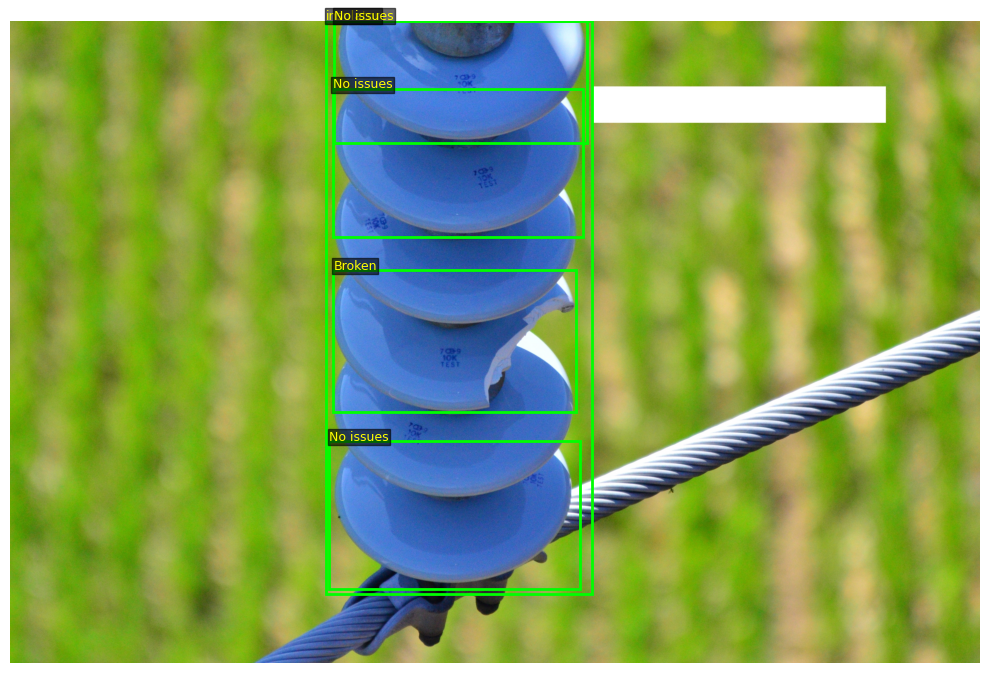

In [29]:
from PIL import Image                           # for image I/O :contentReference[oaicite:8]{index=8}
import matplotlib.pyplot as plt                  # core plotting funcs
import matplotlib.patches as patches             # shapes like Rectangle

# 3a) Load the image
img_path = Path("../data/raw/ididv12/Train/Images") / entry["filename"]
img = Image.open(img_path)                       # lazy-loads image :contentReference[oaicite:9]{index=9}

# 3b) Create figure + axes
fig, ax = plt.subplots(figsize=(10, 8))          # convenience wrapper :contentReference[oaicite:10]{index=10}

# 3c) Display image
ax.imshow(img)                                   # draw the image :contentReference[oaicite:11]{index=11}

# 3d) Overlay each bounding box and label
for obj in objects:
    x, y, w, h = obj["bbox"]
    # draw rectangle
    rect = patches.Rectangle(
        (x, y), w, h,
        linewidth=2,
        edgecolor="lime",
        facecolor="none"                         # transparent fill :contentReference[oaicite:12]{index=12}
    )
    ax.add_patch(rect)

    # annotate with condition (or name)
    label = next(iter(obj.get("conditions", {}).values()), obj.get("name", ""))
    ax.text(
        x, y - 5, label,
        fontsize= nine if False else 9,
        color="yellow",
        bbox=dict(facecolor="black", alpha=0.6, pad=1)
    )                                            # place text at top-left :contentReference[oaicite:13]{index=13}

# 3e) Clean up
ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
import json
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1) Paths
IMG_DIR   = Path("../data/raw/ididv12/Train/Images")
ANNOT_FILE = Path("../data/raw/ididv12/Train/labels_v1.2.json")

# 2) Load master JSON once
with open(ANNOT_FILE, "r") as f:
    data = json.load(f)   # list of { "filename": ..., "Labels": { "objects": [...] } }

# 3) Pick the first 20 entries (or shuffle/sample as you like)
samples = data[:20]

# 4) Create a 4-row × 5-col grid
fig, axes = plt.subplots(
    nrows=4,
    ncols=5,
    figsize=(15, 12),
    squeeze=False,       # always a 2D array of Axes
)

# 5) Loop over each subplot & sample
for ax, entry in zip(axes.flatten(), samples):
    # load image
    img_path = IMG_DIR / entry["filename"]
    img = Image.open(img_path)

    # show image
    ax.imshow(img)
    ax.axis("off")

    # draw boxes & labels
    for obj in entry["Labels"]["objects"]:
        x, y, w, h = obj["bbox"]
        # rectangle
        label = next(iter(obj.get("conditions", {}).values()), obj.get("name", ""))
        if label == 'No issues':
            color = 'green'
        elif label == 'Broken':
            color = 'red'
        elif label == 'insulator':
            color = 'blue'
        else:
            print(label)
        rect = patches.Rectangle(
            (x, y), w, h,
            linewidth=1.0,
            edgecolor=color,
            facecolor="none"
        )
        ax.add_patch(rect)
        # text: condition or name
            
# 6) Tidy & show
plt.tight_layout(pad=1)
plt.show()


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
